In [1]:
import requests

def send_line_notification(message):
    line_token = "9jBlZvpTEg7fQSKaevfKIGU1EQCAxl0SujL7i1pywuQ"
    endpoint = 'https://notify-api.line.me/api/notify'
    message = "\n{}".format(message)
    payload = {'message': message}
    headers = {'Authorization': 'Bearer {}'.format(line_token)}
    requests.post(endpoint, data=payload, headers=headers)

In [2]:
%matplotlib inline
import pandas_profiling as pdp
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
#plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない



/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [57]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'), delim_whitespace=False)
df_test = pd.read_csv(os.path.join(os.getcwd(),'test_set.csv'), delim_whitespace=False)

df_all = pd.concat([df_train,df_test])

quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('PRICE')
quantitative.remove('Id')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.head()

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE
0,0,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2100000.0
1,1,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1950000.0
2,2,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,...,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1325000.0
3,3,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,...,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1240000.0
4,4,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,...,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,592250.0


In [59]:
df_train.GIS_LAST_MOD_DTTM.unique()

array(['2018-07-22 18:01:43', '2018-07-22 18:01:38'], dtype=object)

In [60]:
df_train.SOURCE.unique()

array(['Residential', 'Condominium'], dtype=object)

In [7]:
df_train["LANDAREA"].isnull().sum()

0

In [8]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


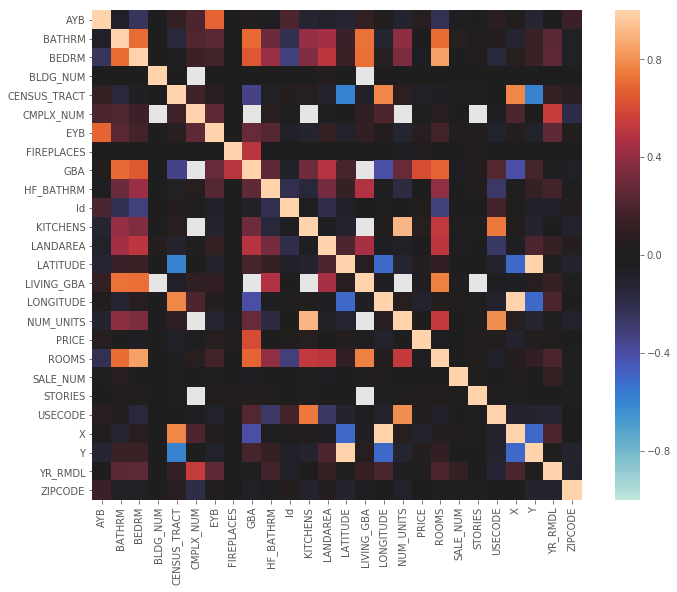

In [9]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_all.corr(), square=True, vmax=1, vmin=-1, center=0)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


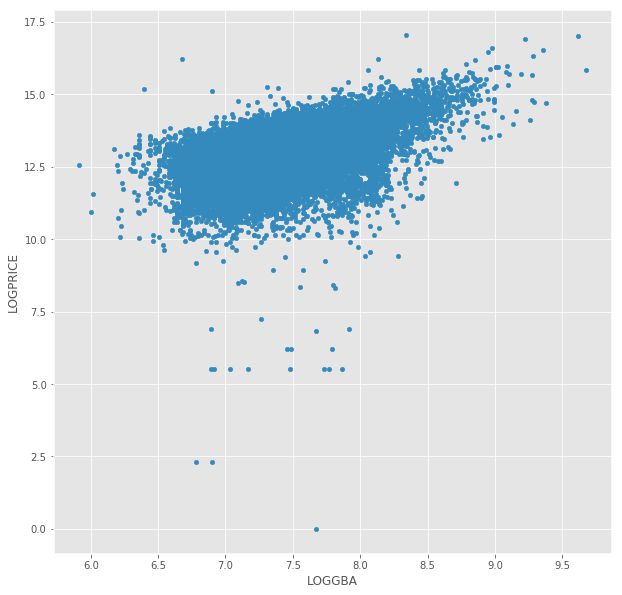

In [10]:

data = pd.DataFrame()

var = 'LOGGBA'
data["LOGGBA"] = np.log(df_train['GBA'])
data["LOGPRICE"] = np.log(df_train['PRICE'])
data["PRICE"] = df_train["PRICE"]


data.head()
data.plot.scatter(x=var,y="LOGPRICE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


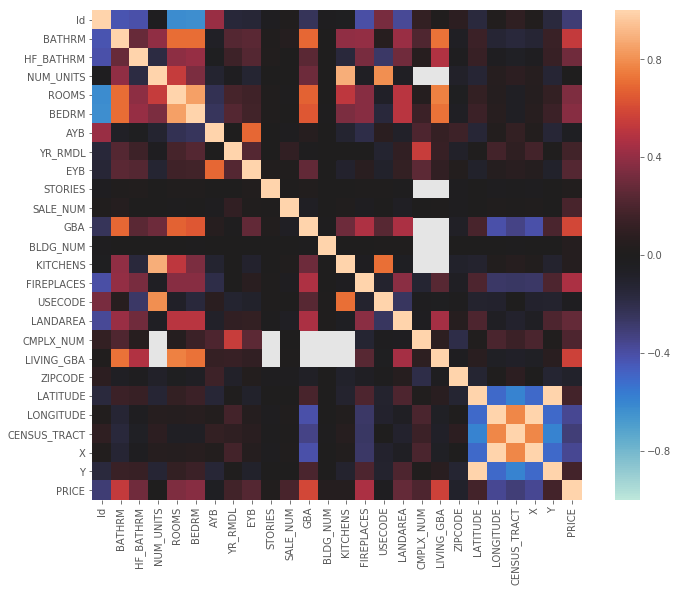

In [11]:

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[(df_train['PRICE'] < 4000000)].corr(), square=True, vmax=1, vmin=-1, center=0)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


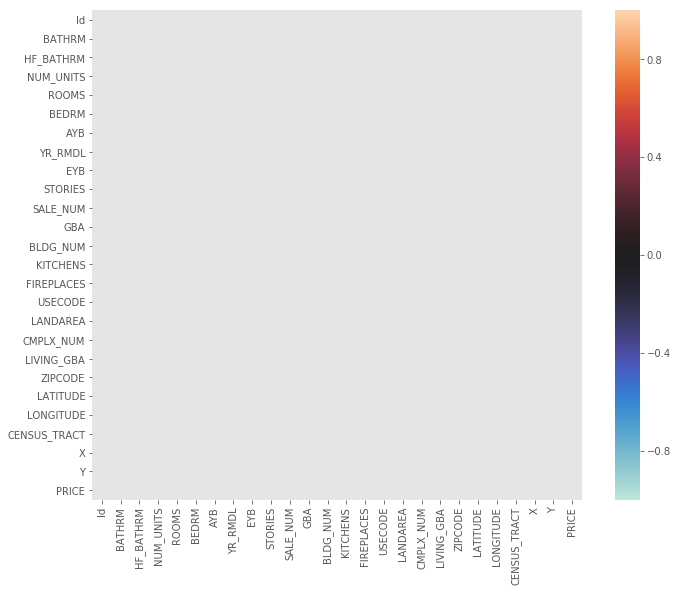

In [12]:

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[(df_train['PRICE'] < 4000000 & (df_train['PRICE'] < 6000000))].corr(), square=True, vmax=1, vmin=-1, center=0)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


,Id,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y,PRICE
Id,1.000000,-0.875614,-0.767545,0.166709,-0.867419,-0.871772,0.481491,0.027564,-0.595298,-0.574079,0.067103,-0.119070,NaN,0.112464,0.030906,0.735605,-0.563145,0.875006,0.190249,0.008572,0.124148,0.205305,0.278341,0.207933,0.128457,0.381224
BATHRM,-0.875614,1.000000,0.798527,-0.163905,0.942301,0.932665,-0.478563,0.139469,0.507223,0.270081,0.025057,0.597961,NaN,0.020782,-0.027962,-0.686306,0.586426,0.018136,0.760984,-0.190274,-0.128654,-0.105824,-0.228911,-0.107931,-0.132421,-0.481614
HF_BATHRM,-0.767545,0.798527,1.000000,-0.220069,0.788930,0.825917,-0.519129,0.189698,0.465210,0.330069,0.004862,0.467130,NaN,-0.073252,-0.025537,-0.653954,0.674487,-0.134583,0.351134,-0.123028,-0.067957,-0.170715,-0.252724,-0.171670,-0.071854,-0.367943
NUM_UNITS,0.166709,-0.163905,-0.220069,1.000000,0.129714,-0.029623,-0.059630,-0.060760,-0.527693,-0.126290,-0.083759,-0.148075,NaN,0.662303,-0.202537,0.742839,-0.130166,NaN,NaN,0.190721,0.042533,0.151803,0.107228,0.152398,0.048339,0.019496
ROOMS,-0.867419,0.942301,0.788930,0.129714,1.000000,0.944175,-0.512023,0.114217,0.481651,0.326624,0.017323,0.687494,NaN,0.256408,-0.036474,-0.600575,0.592783,0.082825,0.864355,-0.153780,-0.110999,-0.092755,-0.240168,-0.093398,-0.114380,-0.476555
BEDRM,-0.871772,0.932665,0.825917,-0.029623,0.944175,1.000000,-0.590715,0.113539,0.462345,0.516901,0.044234,0.636369,NaN,0.165176,-0.048935,-0.654136,0.604369,0.106271,0.746639,-0.203403,-0.121262,-0.129861,-0.266138,-0.131326,-0.124687,-0.491508
AYB,0.481491,-0.478563,-0.519129,-0.059630,-0.512023,-0.590715,1.000000,0.013439,0.197773,-0.363810,-0.361153,-0.095802,NaN,-0.160094,-0.001374,0.351377,-0.464615,-0.968680,-0.110445,0.443509,0.354940,-0.302968,-0.101496,-0.304172,0.357388,0.644924
YR_RMDL,0.027564,0.139469,0.189698,-0.060760,0.114217,0.113539,0.013439,1.000000,0.081685,0.171284,0.095563,0.039395,NaN,0.166094,0.009933,-0.007288,0.055562,0.406919,0.514973,-0.158629,-0.090573,0.106624,0.034996,0.114683,-0.091592,-0.059373
EYB,-0.595298,0.507223,0.465210,-0.527693,0.481651,0.462345,0.197773,0.081685,1.000000,0.218798,-0.602006,0.439002,NaN,-0.242334,-0.040519,-0.412192,0.294090,-0.968997,-0.111044,0.444418,0.285653,-0.625860,-0.524132,-0.626009,0.282842,0.374468
STORIES,-0.574079,0.270081,0.330069,-0.126290,0.326624,0.516901,-0.363810,0.171284,0.218798,1.000000,-0.045461,0.167301,NaN,-0.063108,0.621973,-0.346727,-0.264269,NaN,NaN,-0.113458,0.119262,-0.187825,0.038808,-0.174476,0.119619,-0.194084


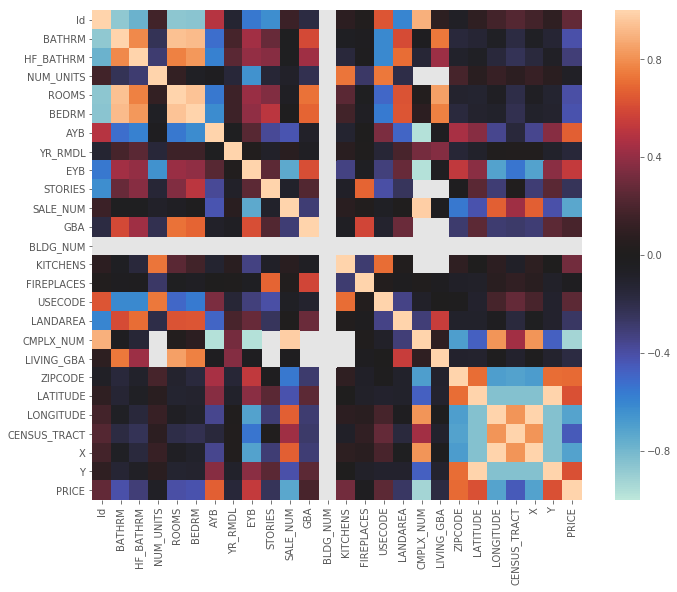

In [13]:

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[(df_train['PRICE'] > 6000000)].corr(), square=True, vmax=1, vmin=-1, center=0)
df_train[(df_train['PRICE'] > 5397300)].corr()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


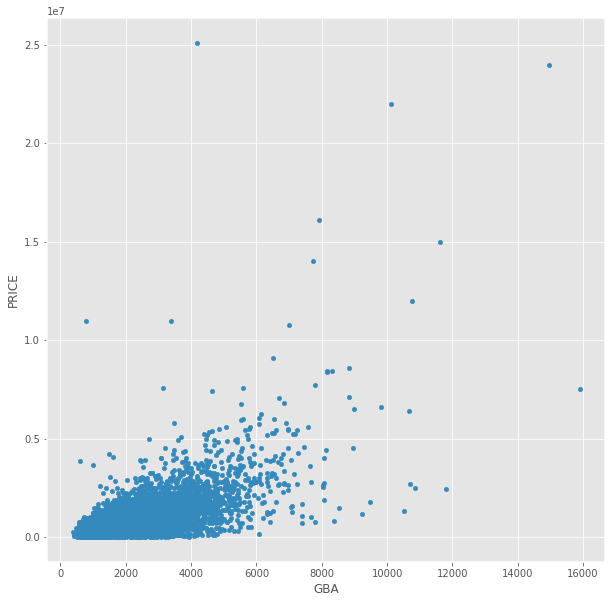

In [14]:

data = pd.DataFrame()

var = 'GBA'
data["GBA"] = df_train['GBA']
#data["LOGPRICE"] = np.log(df_train['PRICE'])
data["PRICE"] = df_train["PRICE"]


data.head()
data.plot.scatter(x=var,y="PRICE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


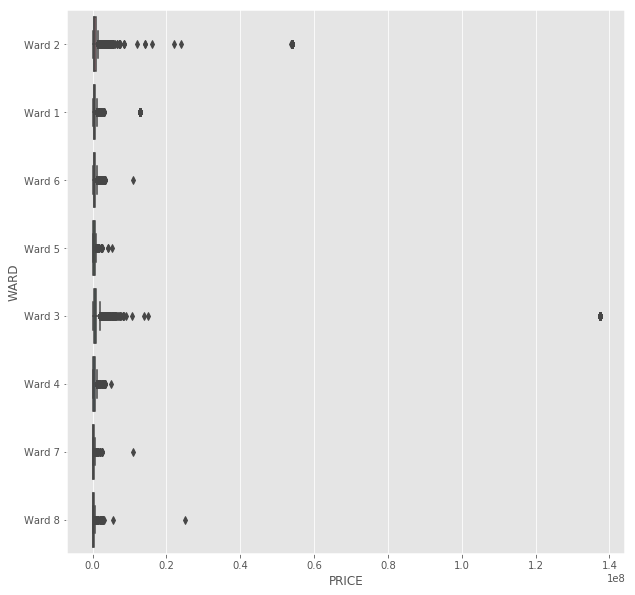

In [15]:
data["WARD"] = df_train["WARD"]
var = "WARD"
fig = sns.boxplot(x="PRICE", y="WARD", data=data)
#plt.xlim(0,5000000)

In [16]:
#fig = sns.swarmplot(x=df_train["WARD"], y=df_train["PRICE"])

In [17]:
#fig = sns.pointplot(y=df_train["WARD"], x=df_train["PRICE"])
#plt.xlim(0,1000000)

In [18]:
df_train.describe()

,Id,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y,PRICE
count,49108.000000,49108.000000,49108.000000,29055.000000,49108.000000,49108.000000,49052.000000,28690.000000,49108.000000,29037.000000,49108.000000,29055.000000,49108.000000,29055.000000,49108.000000,49108.000000,49108.000000,20053.000000,20053.000000,49108.000000,49108.000000,49108.000000,49108.000000,49061.000000,49061.000000,4.910800e+04
mean,24553.500000,1.863749,0.445752,1.222647,5.937159,2.614605,1945.066929,2000.653050,1965.969129,2.135269,1.864869,1731.001101,1.000143,1.255102,6.432251,14.609880,2100.559094,2447.530095,884.821822,20012.236397,38.913835,-77.017993,5290.355889,-77.018026,38.913834,9.314342e+05
std,14176.402847,0.985460,0.575292,0.627569,2.645247,1.393178,36.236955,18.155333,27.380213,5.072188,1.403469,842.098964,0.011938,0.689166,1326.332555,3.693812,2963.268001,1134.268983,405.358621,15.499051,0.030273,0.039790,3292.918040,0.039778,0.030259,7.001692e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000,371.000000,1.000000,0.000000,0.000000,11.000000,0.000000,1001.000000,231.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576,1.000000e+00
25%,12276.750000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1991.000000,1954.000000,2.000000,1.000000,1216.000000,1.000000,1.000000,0.000000,11.000000,491.000000,1600.000000,620.000000,20005.000000,38.895925,-77.042717,2201.000000,-77.042719,38.895729,2.390000e+05
50%,24553.500000,2.000000,0.000000,1.000000,6.000000,3.000000,1939.000000,2005.000000,1965.000000,2.000000,1.000000,1504.000000,1.000000,1.000000,0.000000,13.000000,1397.000000,2294.000000,783.000000,20010.000000,38.913910,-77.021382,5002.000000,-77.021213,38.913907,3.999990e+05
75%,36830.250000,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,3.000000,1984.000000,1.000000,1.000000,1.000000,17.000000,2562.000000,2981.000000,1054.000000,20017.000000,38.933823,-76.990497,8100.000000,-76.990703,38.933756,6.545000e+05
max,49107.000000,11.000000,7.000000,6.000000,31.000000,14.000000,2018.000000,2019.000000,2018.000000,826.000000,14.000000,15902.000000,2.000000,44.000000,293920.000000,117.000000,187301.000000,5621.000000,5857.000000,20392.000000,38.995435,-76.909883,11100.000000,-76.910511,38.993646,1.374275e+08


In [19]:
df_train.isnull().sum()

Id                        0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             20053
ROOMS                     0
BEDRM                     0
AYB                      56
YR_RMDL               20418
EYB                       0
STORIES               20071
SALEDATE                  1
QUALIFIED                 0
SALE_NUM                  0
GBA                   20053
BLDG_NUM                  0
STYLE                 20053
STRUCT                20053
GRADE                 20053
CNDTN                 20053
EXTWALL               20053
ROOF                  20053
INTWALL               20053
KITCHENS              20053
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             29055
LIVING_GBA            29055
FULLADDRESS           20216
CITY                  20214
STATE                 20214
ZIPCODE             

In [20]:
#df_train["PRICE"] = replace_outlier(df_train["PRICE"])

(array([4.8918e+04, 8.0000e+00, 0.0000e+00, 6.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1800e+02]),
 array([1.00000000e+00, 1.37427554e+07, 2.74855098e+07, 4.12282642e+07,
        5.49710186e+07, 6.87137730e+07, 8.24565274e+07, 9.61992818e+07,
        1.09942036e+08, 1.23684791e+08, 1.37427545e+08]),
 <a list of 10 Patch objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


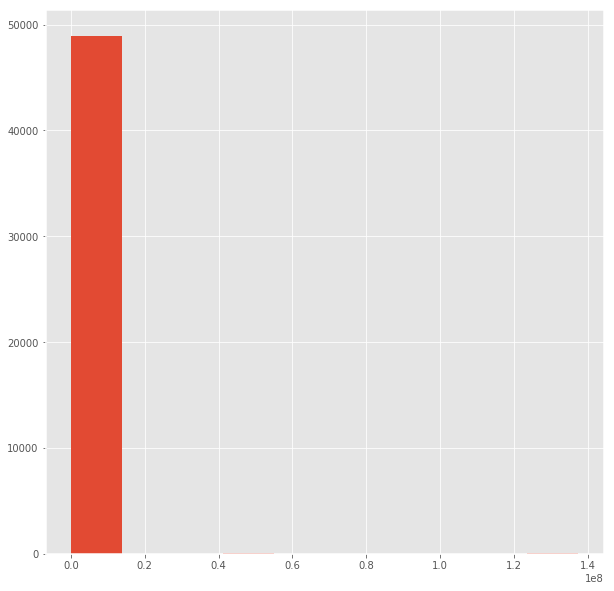

In [21]:
plt.hist(df_train["PRICE"])

In [22]:

df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'))

missing = df_train.copy()
missing = missing.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(['GBA','LANDAREA'
       ]).sum()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,count
GBA,LANDAREA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12425.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29055.0,29055.0,163.0,161.0,161.0,0.0,161.0,0.0,0.0,0.0,4005.0,0.0,161.0,0.0,0.0,47.0,47.0,47.0,0.0,29055
True,False,0.0,0.0,0.0,0.0,0.0,20053.0,0.0,0.0,12.0,7993.0,0.0,20053.0,0.0,0.0,0.0,0.0,20053.0,20053.0,20053.0,20053.0,20053.0,20053.0,20053.0,20053.0,0.0,0.0,0.0,0.0,0.0,0.0,20053.0,20053.0,20053.0,0.0,20053.0,0.0,0.0,0.0,6118.0,0.0,20053.0,0.0,0.0,0.0,0.0,0.0,0.0,20053


In [23]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE'],
      dtype='object')

In [24]:
var =["STORIES","PRICE"]
df_train[var].corr()

,STORIES,PRICE
STORIES,1.000000,0.026104
PRICE,0.026104,1.000000


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


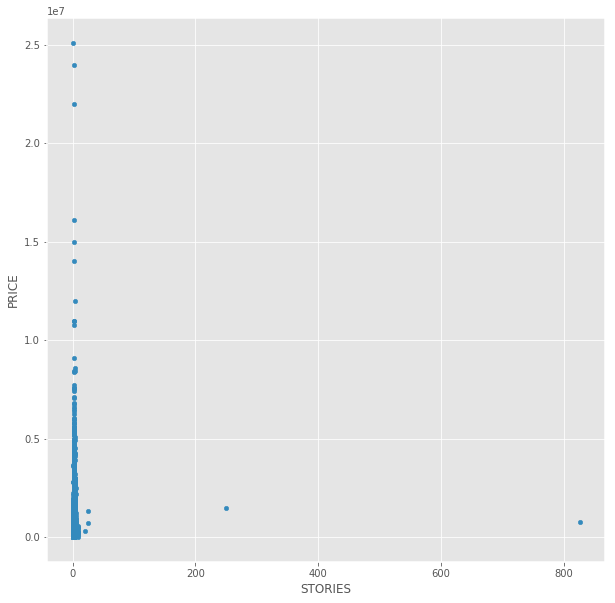

In [25]:
df_train[var].plot.scatter(x="STORIES",y="PRICE")

(array([2.300e+01, 8.400e+01, 3.190e+02, 7.670e+02, 1.137e+03, 1.342e+03,
        1.480e+03, 1.835e+03, 1.749e+03, 1.621e+03, 1.139e+03, 1.317e+03,
        9.160e+02, 8.660e+02, 7.260e+02, 5.720e+02, 5.880e+02, 5.610e+02,
        4.250e+02, 4.430e+02, 3.300e+02, 2.710e+02, 2.100e+02, 1.700e+02,
        1.840e+02, 1.690e+02, 1.240e+02, 8.600e+01, 8.900e+01, 9.600e+01,
        6.200e+01, 3.400e+01, 2.600e+01, 4.200e+01, 3.100e+01, 2.700e+01,
        1.400e+01, 1.500e+01, 9.000e+00, 1.900e+01, 1.900e+01, 1.100e+01,
        8.000e+00, 6.000e+00, 9.000e+00, 5.000e+00, 8.000e+00, 4.000e+00,
        2.000e+00, 9.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+0

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


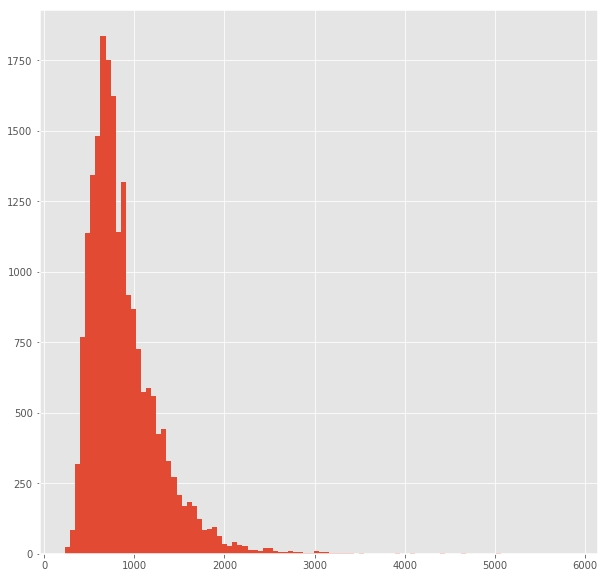

In [26]:
plt.hist(df_train["LIVING_GBA"].dropna(),bins=100)

In [27]:
df_train[["LANDAREA","GBA"]].corr()

,LANDAREA,GBA
LANDAREA,1.00000,0.48597
GBA,0.48597,1.00000


In [28]:
k = 10#number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'PRICE')["PRICE"].index

df_train[cols].corr()

,PRICE,GBA,AYB,KITCHENS,EYB,Y,LATITUDE,FIREPLACES,Id,YR_RMDL
PRICE,1.000000,0.606347,0.055470,0.049589,0.049022,0.044093,0.044039,0.034193,0.033374,0.027272
GBA,0.606347,1.000000,0.039256,0.286094,0.284685,0.185320,0.185219,0.501462,-0.239588,-0.011501
AYB,0.055470,0.039256,1.000000,-0.114820,0.686281,-0.132927,-0.133414,0.002120,0.422956,0.000390
KITCHENS,0.049589,0.286094,-0.114820,1.000000,-0.096213,-0.103397,-0.103876,-0.020358,-0.033755,-0.006541
EYB,0.049022,0.284685,0.686281,-0.096213,1.000000,-0.088143,-0.088404,-0.000444,-0.136251,0.227958
Y,0.044093,0.185320,-0.132927,-0.103397,-0.088143,1.000000,0.999922,-0.001282,-0.158779,0.014717
LATITUDE,0.044039,0.185219,-0.133414,-0.103876,-0.088404,0.999922,1.000000,-0.001282,-0.158360,0.015069
FIREPLACES,0.034193,0.501462,0.002120,-0.020358,-0.000444,-0.001282,-0.001282,1.000000,0.004503,0.001744
Id,0.033374,-0.239588,0.422956,-0.033755,-0.136251,-0.158779,-0.158360,0.004503,1.000000,-0.139638
YR_RMDL,0.027272,-0.011501,0.000390,-0.006541,0.227958,0.014717,0.015069,0.001744,-0.139638,1.000000


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


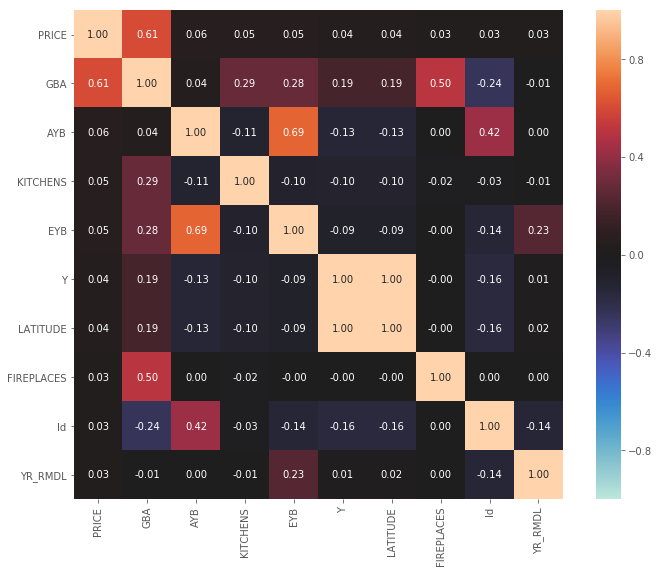

In [29]:
cm = np.corrcoef(df_train[cols].values.T)


fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train[cols].corr(), square=True, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
           )

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


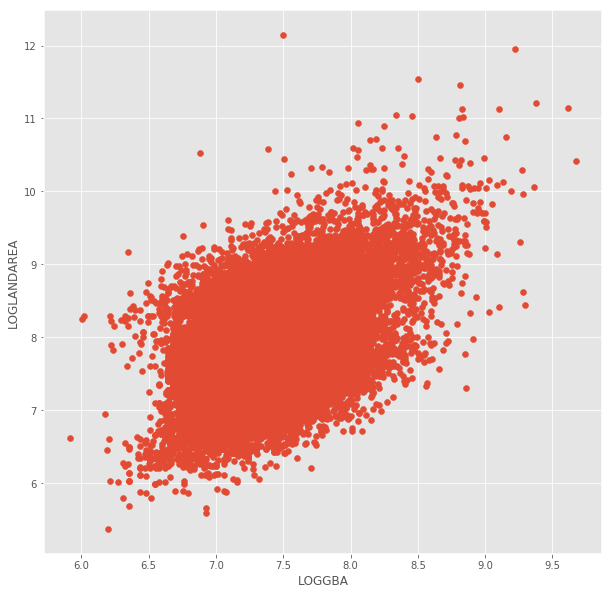

In [30]:
df_train["LOGGBA"] = np.log(df_train["GBA"])
df_train["LOGLANDAREA"] = np.log(df_train["LANDAREA"])
plt.scatter(df_train["LOGGBA"],df_train["LOGLANDAREA"])
plt.xlabel("LOGGBA")
plt.ylabel("LOGLANDAREA")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


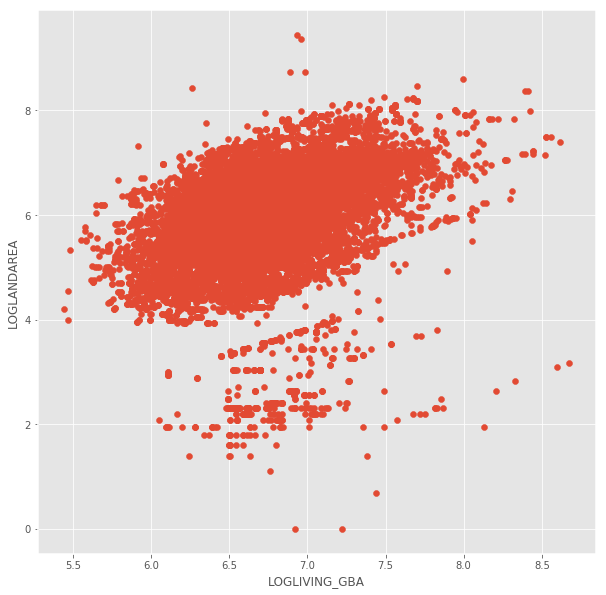

In [31]:
plt.scatter(np.log(df_train["LIVING_GBA"]),np.log(df_train["LANDAREA"]))
plt.xlabel("LOGLIVING_GBA")
plt.ylabel("LOGLANDAREA")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


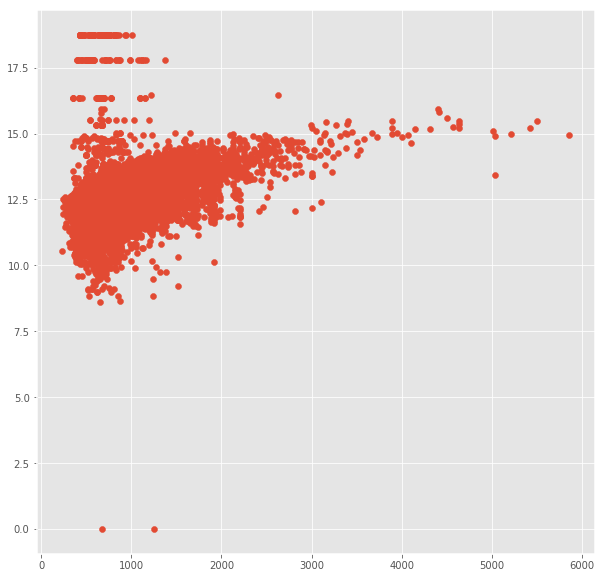

In [32]:
plt.scatter(df_train["LIVING_GBA"],np.log(df_train["PRICE"]))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

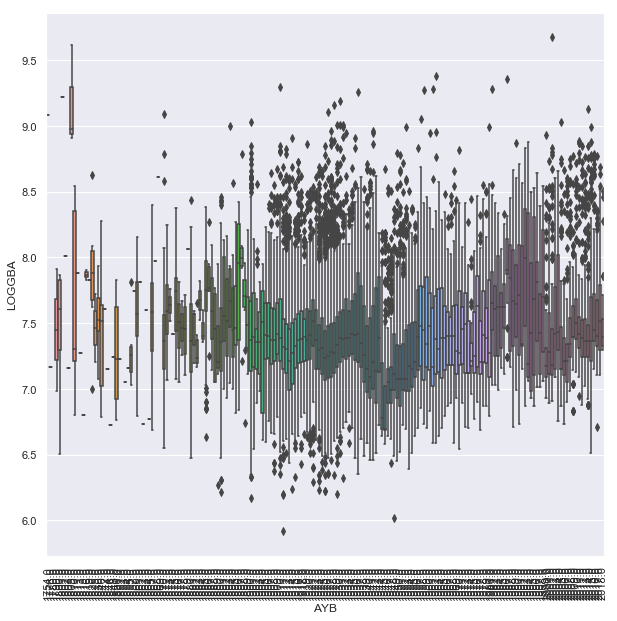

In [33]:
var = 'AYB'
data = pd.concat([df_train['LOGGBA'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt

sns.set(font_scale=1) 
fig = sns.boxplot(x=var, y="LOGGBA", data=data)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

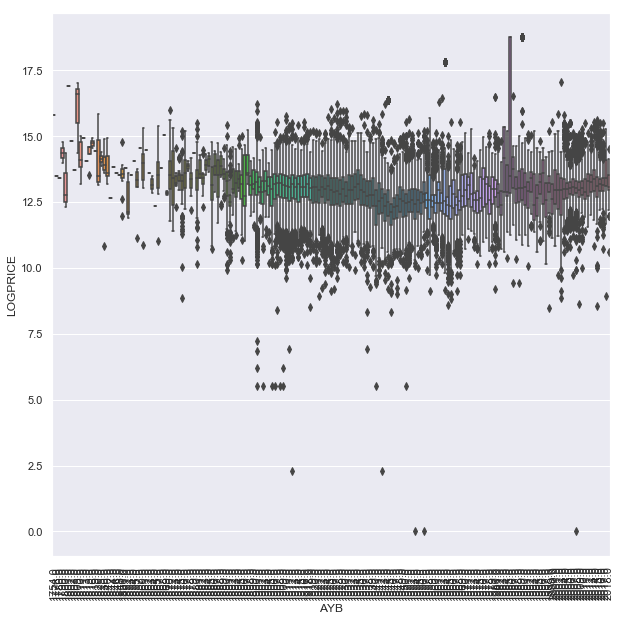

In [34]:
var = 'AYB'
df_train["LOGPRICE"] = np.log(df_train["PRICE"])
data = pd.concat([df_train['LOGPRICE'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt

sns.set(font_scale=1) 
fig = sns.boxplot(x=var, y="LOGPRICE", data=data)
plt.xticks(rotation=90)

,Null Count
Feature,
CMPLX_NUM,29055
LIVING_GBA,29055
YR_RMDL,20418
FULLADDRESS,20216
CITY,20214
CENSUS_BLOCK,20214
STATE,20214
NATIONALGRID,20214
STORIES,20071


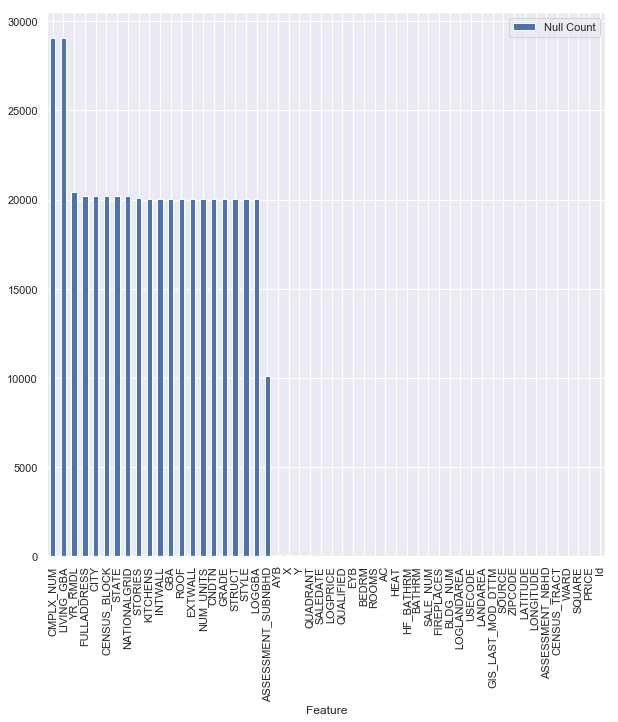

In [35]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls.plot.bar()

nulls

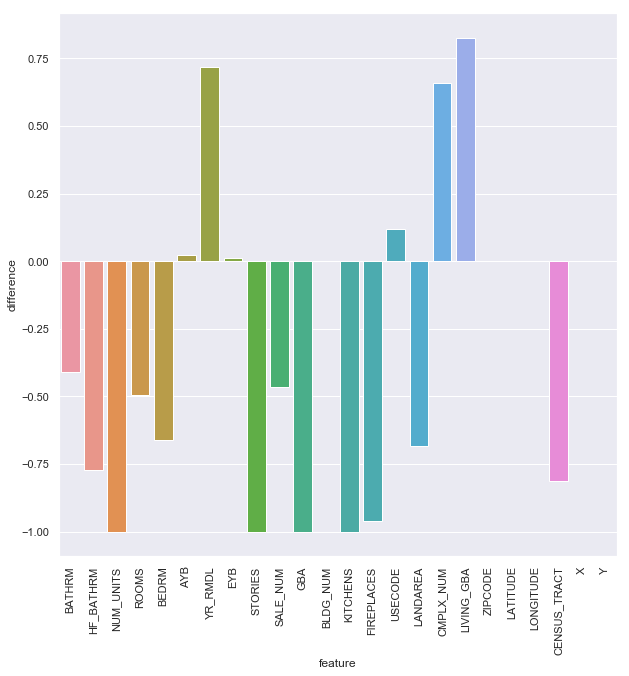

In [36]:
features = quantitative

standard = df_train[df_train['PRICE'] < 53973000]
pricey = df_train[df_train['PRICE'] >= 53973000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

In [37]:
df_train['IsNew'] = df_train['AYB'].apply(lambda x: 1 if x > 2000 else 0)
df_train['IsRMDL'] = df_train['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
df_train["IsLAEGE"] = df_train["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)

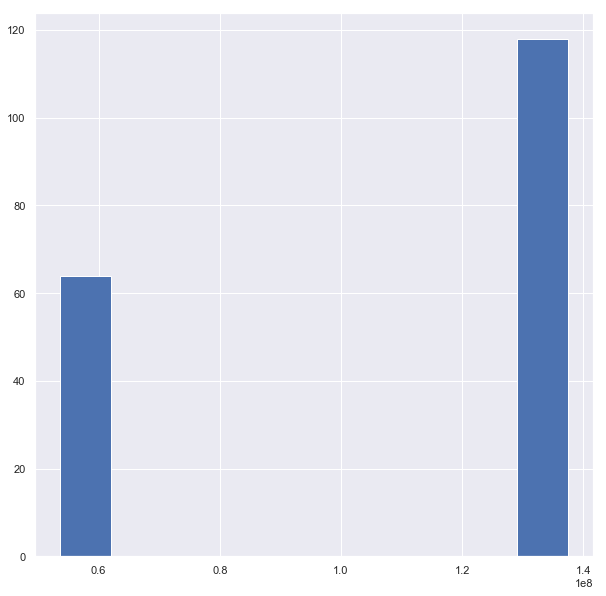

In [38]:
df_train[df_train["PRICE"]>50000000].PRICE.hist()

In [39]:
a = df_train[df_train["PRICE"]<10000]

In [40]:
a

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,LOGGBA,LOGLANDAREA,LOGPRICE,IsNew,IsRMDL,IsLAEGE
127,127,3,0,Hot Water Rad,N,3.0,11,3,1907.0,NaN,1954,3.00,2002-04-24 00:00:00,U,1,2443.0,1,3 Story,Row Inside,Very Good,Fair,Common Brick,Built Up,Hardwood,2.0,0,24,1190,2018-07-22 18:01:43,Residential,NaN,NaN,1739 U STREET NW,WASHINGTON,DC,20009.0,18S UJ 23154 09566,38.917202,-77.039830,Old City 2,040 D Old City 2,4201.0,004201 2002,Ward 1,150,-77.039567,38.917462,NW,4500.0,7.800982,7.081709,8.411833,0,0,0
988,988,2,1,Hot Water Rad,N,1.0,9,4,1900.0,1996.0,1969,2.00,1996-11-21 00:00:00,U,2,2142.0,1,2 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwood,1.0,3,11,1398,2018-07-22 18:01:43,Residential,NaN,NaN,615 P STREET NW,WASHINGTON,DC,20001.0,18S UJ 24803 08713,38.909843,-77.020603,Old City 2,040 B Old City 2,4801.0,004801 1016,Ward 6,445,-77.020725,38.910531,NW,936.0,7.669495,7.242798,6.841615,0,0,0
1237,1237,1,1,Hot Water Rad,Y,1.0,6,3,1900.0,2004.0,1960,2.00,2000-02-08 00:00:00,U,1,1424.0,1,2 Story,Row Inside,Good Quality,Average,Common Brick,Built Up,Hardwood,1.0,5,11,1360,2018-07-22 18:01:43,Residential,NaN,NaN,1832 13TH STREET NW,WASHINGTON,DC,20009.0,18S UJ 24011 09312,38.915094,-77.029890,Old City 2,040 E Old City 2,4400.0,004400 2009,Ward 1,238,-77.030583,38.915053,NW,1377.0,7.261225,7.215240,7.227662,0,1,0
2218,2218,3,1,Forced Air,Y,2.0,10,5,1900.0,NaN,1957,2.00,1997-02-19 00:00:00,U,1,2372.0,1,2 Story,Multi,Above Average,Average,Common Brick,Comp Shingle,Hardwood,2.0,0,23,2030,2018-07-22 18:01:43,Residential,NaN,NaN,514 K STREET NE,WASHINGTON,DC,20002.0,18S UJ 26666 07892,38.902819,-76.998925,Old City 1,039 L Old City 1,10600.0,010600 2046,Ward 6,830,-76.998712,38.903152,NE,250.0,7.771489,7.615791,5.521461,0,0,0
5083,5083,1,0,Hot Water Rad,N,1.0,6,3,1918.0,NaN,1960,2.00,1998-11-13 00:00:00,U,1,1254.0,1,2 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwood,1.0,0,11,1116,2018-07-22 18:01:43,Residential,NaN,NaN,104 15TH STREET NE,WASHINGTON,DC,20002.0,18S UJ 27944 06573,38.891191,-76.983864,Old City 1,039 F Old City 1,8002.0,008002 1010,Ward 6,1056,-76.984468,38.891348,NE,5000.0,7.134094,7.017506,8.517193,0,0,0
12702,12702,2,1,Warm Cool,Y,1.0,8,4,1937.0,NaN,1954,2.25,1998-12-30 00:00:00,U,1,1914.0,1,2.5 Story Fin,Single,Very Good,Average,Common Brick,Slate,Hardwood,1.0,2,12,6771,2018-07-22 18:01:43,Residential,NaN,NaN,7806 13TH STREET NW,WASHINGTON,DC,20012.0,18S UJ 24175 17058,38.984872,-77.029978,Shepherd Heights,NaN,1600.0,001600 1017,Ward 4,2771,-77.031723,38.985692,NW,4156.0,7.556951,8.820404,8.332308,0,0,0
13754,13754,2,0,Forced Air,N,1.0,8,5,1908.0,1988.0,1960,3.00,1999-11-08 00:00:00,Q,1,2281.0,1,3 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Wood Floor,1.0,0,11,2417,2018-07-22 18:01:43,Residential,NaN,NaN,1326 IRVING STREET NW,WASHINGTON,DC,20010.0,18S UJ 23975 10790,38.928385,-77.030679,Columbia Heights,015 E Columbia Heights,3000.0,003000 2001,Ward 1,2849,-77.030947,38.928395,NW,250.0,7.732369,7.790282,5.521461,0,0,0
14044,14044,2,0,Hot Water Rad,N,2.0,8,2,1902.0,NaN,1964,2.00,1998-07-09 00:00:00,U,1,1766.0,1,2 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Wood Floor,2.0,0,23,1535,2018-07-22 18:01:43,Residential,NaN,NaN,3013 SHERMAN AVENUE NW,WASHINGTON,DC,20001.0,18S UJ 24391 10765,38.928248,-77.025875,Columbia Heights,015 E Columbia Heights,3100.0,003100 1013,Ward 1,2890,-77.025553,38.928425,NW,250.0,7.476472,7.336286,5.521461,0,0,0
14055,14055,2,0,Hot Water Rad,N,2.0,6,2,NaN,NaN,1954,2.00,1998-10-13 00:00:00,U,1,1784.0,1,2 Story,Row End,Average,Average,Common Brick,Comp Shingle,Wood Floor,2.0,0,11,158

In [41]:
df_res = df_train[df_train["SOURCE"] == "Residential"]

In [42]:
df_res

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,LOGGBA,LOGLANDAREA,LOGPRICE,IsNew,IsRMDL,IsLAEGE
0,0,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2100000.0,7.832808,7.426549,14.557448,0,1,0
1,1,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,4.0,2010-02-26 00:00:00,Q,1,5344.0,1,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,1.0,4,11,2196,2018-07-22 18:01:43,Residential,NaN,NaN,1709 S STREET NW,WASHINGTON,DC,20009.0,18S UJ 23157 09248,38.914331,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1950000.0,8.583730,7.694393,14.483340,0,0,0
2,2,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,1967,2.0,2011-09-30 00:00:00,Q,1,2692.0,1,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,2.0,1,24,1815,2018-07-22 18:01:43,Residential,NaN,NaN,1721 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23158 09326,38.915038,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1325000.0,7.898040,7.503841,14.096923,0,0,0
3,3,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,1967,2.0,2010-11-04 00:00:00,Q,1,1662.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,1.0,0,11,1424,2018-07-22 18:01:43,Residential,NaN,NaN,1725 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23147 09324,38.915018,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1240000.0,7.415777,7.261225,14.030622,0,1,0
4,4,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,1969,2.0,2001-07-23 00:00:00,Q,1,1598.0,1,2 Story,Row Inside,Good Quality,Good,Common Brick,Built Up,Hardwood,2.0,1,24,1424,2018-07-22 18:01:43,Residential,NaN,NaN,1735 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23122 09325,38.915019,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,592250.0,7.376508,7.261225,13.291684,0,1,0
5,5,2,1,Forced Air,Y,1.0,5,3,1880.0,2010.0,1984,2.0,2012-08-21 00:00:00,Q,1,1600.0,1,2 Story,Semi-Detached,Above Average,Very Good,Common Brick,Built Up,Hardwood,1.0,1,13,2090,2018-07-22 18:01:43,Residential,NaN,NaN,1447 Q STREET NW,WASHINGTON,DC,20009.0,18S UJ 23647 08908,38.911368,-77.033972,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,1065000.0,7.377759,7.644919,13.878485,0,1,0
6,6,3,0,Hot Water Rad,Y,4.0,9,3,1900.0,1963.0,1967,3.0,2005-04-06 00:00:00,Q,1,2520.0,1,3 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Wood Floor,4.0,0,24,1853,2018-07-22 18:01:43,Residential,NaN,NaN,1456 CORCORAN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23630 08948,38.911732,-77.034182,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,703700.0,7.832014,7.524561,13.464107,0,0,0
7,7,2,2,Warm Cool,Y,2.0,8,4,1800.0,2009.0,1967,3.0,1997-10-20 00:00:00,U,1,2520.0,1,3 Story,Row Inside,Above Average,Good,Common Brick,Built Up,Wood Floor,2.0,0,24,1853,2018-07-22 18:01:43,Residential,NaN,NaN,1432 CORCORAN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23701 08943,38.911701,-77.033367,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,339500.0,7.832014,7.524561,12.735229,0,1,0
8,8,3,1,Forced Air,Y,2.0,9,4,1890.0,2009.0,1967,3.0,2015-09-16 00:00:00,Q,4,2520.0,1,3 Story,Row Inside,Above Average,Good,Common Brick,Built Up,Hardwood,2.0,2,24,1853,2018-07-22 18:01:43,Resi

In [43]:
df_con = df_train[df_train["SOURCE"] == "Condominium"]
df_con

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,LOGGBA,LOGLANDAREA,LOGPRICE,IsNew,IsRMDL,IsLAEGE
29055,29055,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-20 00:00:00,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,716,2018-07-22 18:01:38,Condominium,5329.0,1084.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW,599900.0,NaN,6.573680,13.304518,0,1,0
29056,29056,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2017-02-10 00:00:00,Q,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,923,2018-07-22 18:01:38,Condominium,5329.0,1405.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW,690900.0,NaN,6.827629,13.445750,0,1,0
29057,29057,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2017-04-07 00:00:00,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,923,2018-07-22 18:01:38,Condominium,5329.0,1405.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW,765900.0,NaN,6.827629,13.548807,0,1,0
29058,29058,2,0,Forced Air,Y,NaN,4,2,1911.0,2016.0,1919,NaN,2016-12-13 00:00:00,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,844,2018-07-22 18:01:38,Condominium,5329.0,1278.0,NaN,NaN,NaN,20010.0,NaN,38.933606,-77.021312,Columbia Heights,015 C Columbia Heights,3200.0,NaN,Ward 1,3037,-77.021314,38.933613,NW,738400.0,NaN,6.738152,13.512241,0,1,0
29059,29059,2,0,Forced Air,Y,NaN,4,2,2007.0,NaN,2007,NaN,2014-02-20 00:00:00,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,471,2018-07-22 18:01:38,Condominium,3175.0,955.0,NaN,NaN,NaN,20011.0,NaN,38.955759,-77.010407,Chillum,NaN,2102.0,NaN,Ward 4,3393,-77.010410,38.955767,NW,264405.0,NaN,6.154858,12.485237,1,0,0
29060,29060,2,0,Forced Air,Y,NaN,4,2,2007.0,NaN,2007,NaN,2013-11-25 00:00:00,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,471,2018-07-22 18:01:38,Condominium,3175.0,980.0,NaN,NaN,NaN,20011.0,NaN,38.955759,-77.010407,Chillum,NaN,2102.0,NaN,Ward 4,3393,-77.010410,38.955767,NW,265000.0,NaN,6.154858,12.487485,1,0,0
29061,29061,1,1,Forced Air,Y,NaN,4,2,1937.0,2017.0,1937,NaN,2017-08-15 00:00:00,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,788,2018-07-22 18:01:38,Condominium,5528.0,777.0,NaN,NaN,NaN,20011.0,NaN,38.952875,-77.012602,Petworth,042 C Petworth,2102.0,NaN,Ward 4,3399,-77.012605,38.952882,NW,362500.0,NaN,6.669498,12.800780,0,1,0
29062,29062,1,0,Forced Air,Y,NaN,3,1,2004.0,NaN,2004,NaN,2014-03-31 00:00:00,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,374,2018-07-22 18:01:38,Condominium,2661.0,670.0,NaN,NaN,NaN,20024.0,NaN,38.880821,-77.014271,Southwest Waterfront,NaN,10500.0,NaN,Ward 6,0540,-77.014273,38.880828,SW,305000.0,NaN,5.924256,12.628067,1,0,0
29063,29063,1,0,Forced Air,Y,NaN,3,1,2004.0,NaN,2004,NaN,2017-05-19 00:00:00,Q,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,374,2018-07-22 18:01:38,Condominium,2661.0,670.0,NaN,NaN,NaN,20024.0,NaN,38.880821,-77.014271,Southwest Waterfront,NaN,10500.0,NaN,Ward 6,0540,-77.014273,38.880828,SW,384000.0,NaN,5.924256,12.858398,1,0,0
29064,29064,1,0,Forced Air,Y,NaN,3,1,2004.0,NaN,2004,NaN,2005-02-04 00:00:00,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,374,2018-07-22 18:01:38,Condominium,2661.0,670.0,NaN,NaN,NaN,20024.0,NaN,38.880821,-77.014271,Southwest Waterfront,NaN,10500.0,NaN,Ward 6,0540,-77.014273,38.880828,SW,308000.0,NaN,5.924256,12.637855,1,0,0


In [44]:
df_train.CENSUS_TRACT.unique()

array([ 4201.,  5201.,  4300.,  5500.,  4202.,  5600.,  4400.,  5301.,
       10700., 10800.,  5001.,  5002.,  4801.,  4802.,  4901.,  6400.,
        4902., 10200.,  4600.,  4701.,  7200.,  8200.,  7000.,  8301.,
        6500.,  4702., 11000., 10600.,  8302.,  6600.,  8100.,  8410.,
        8402.,  6700.,  6900.,  8001.,  8002.,  7100.,  6802.,  6801.,
         202.,   100.,  6804.,   300.,   702.,   802.,   801.,   902.,
         901.,  1001.,  1100.,  1002.,  1200.,   701.,   600.,  1500.,
        1302.,  1401.,   400.,  1402.,  1301.,   502.,  4100.,  4001.,
         501.,  2701.,  3800.,  4002.,  2702.,  2600.,  3900.,  2801.,
        2502.,  2501.,  2802.,  3700.,  2001.,  1804.,  1803.,  1600.,
        2002.,  2900.,  3000.,  3100.,  3600.,  3500.,  1901.,  2101.,
        2201., 10300.,  2400.,  1702.,  3200.,  3400.,  3302.,  3301.,
        2102.,  2301.,  2202.,  1902.,  8701.,  9203.,  9505.,  9204.,
        9201.,  9501.,  8702.,  9508.,  9507.,  9509.,  9504.,  9302.,
      

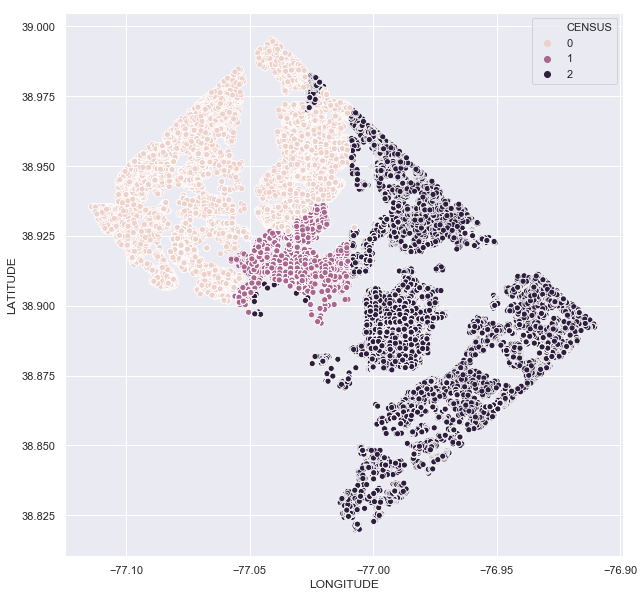

In [45]:
def func_cate(x):
    if  x < 3000:
        return 0
    elif x >= 3000 and x < 6000:
        return 1
    else:
        return 2


df_train['CENSUS'] = df_train['CENSUS_TRACT'].apply(func_cate)
df_all['CENSUS'] = df_all['CENSUS_TRACT'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="CENSUS")


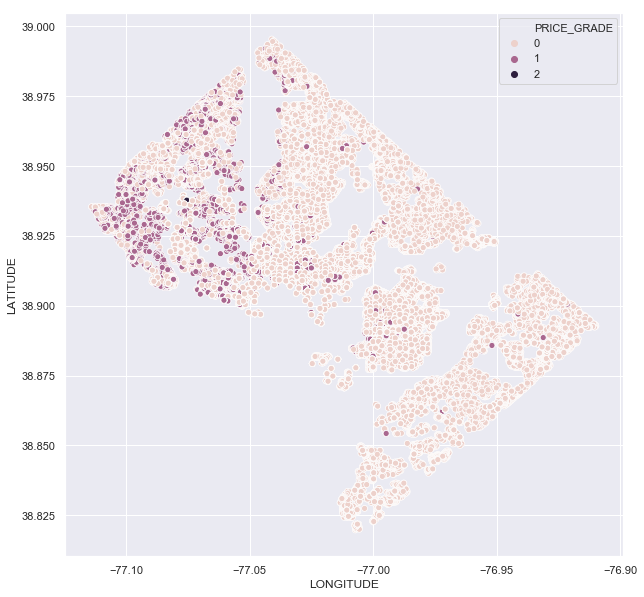

In [46]:
def func_cate(x):
    if  x < 1000000:
        return 0
    elif x >= 1000000 and x < 53973000:
        return 1
    else:
        return 2


df_train['PRICE_GRADE'] = df_train['PRICE'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

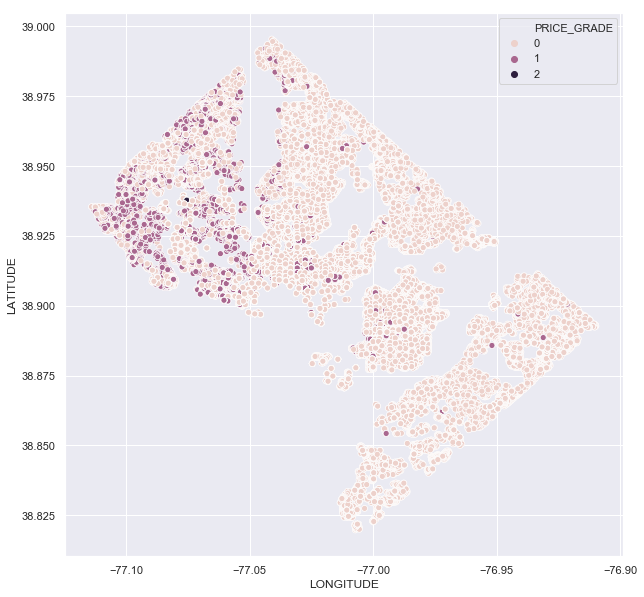

In [47]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

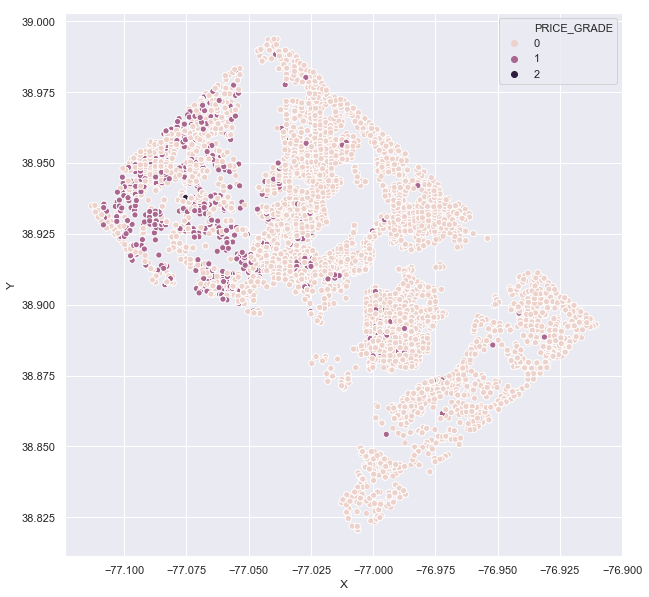

In [48]:
sns.scatterplot(x="X", y="Y", data=df_train,hue="PRICE_GRADE")

In [49]:
df_train.columns

Index(['Id', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'PRICE',
       'LOGGBA', 'LOGLANDAREA', 'LOGPRICE', 'IsNew', 'IsRMDL', 'IsLAEGE',
       'CENSUS', 'PRICE_GRADE'],
      dtype='object')

In [50]:
df_train

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE,LOGGBA,LOGLANDAREA,LOGPRICE,IsNew,IsRMDL,IsLAEGE,CENSUS,PRICE_GRADE
0,0,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2100000.0,7.832808,7.426549,14.557448,0,1,0,1,1
1,1,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,4.0,2010-02-26 00:00:00,Q,1,5344.0,1,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,1.0,4,11,2196,2018-07-22 18:01:43,Residential,NaN,NaN,1709 S STREET NW,WASHINGTON,DC,20009.0,18S UJ 23157 09248,38.914331,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1950000.0,8.583730,7.694393,14.483340,0,0,0,1,1
2,2,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,1967,2.0,2011-09-30 00:00:00,Q,1,2692.0,1,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,2.0,1,24,1815,2018-07-22 18:01:43,Residential,NaN,NaN,1721 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23158 09326,38.915038,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1325000.0,7.898040,7.503841,14.096923,0,0,0,1,1
3,3,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,1967,2.0,2010-11-04 00:00:00,Q,1,1662.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,1.0,0,11,1424,2018-07-22 18:01:43,Residential,NaN,NaN,1725 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23147 09324,38.915018,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,1240000.0,7.415777,7.261225,14.030622,0,1,0,1,1
4,4,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,1969,2.0,2001-07-23 00:00:00,Q,1,1598.0,1,2 Story,Row Inside,Good Quality,Good,Common Brick,Built Up,Hardwood,2.0,1,24,1424,2018-07-22 18:01:43,Residential,NaN,NaN,1735 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23122 09325,38.915019,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW,592250.0,7.376508,7.261225,13.291684,0,1,0,1,0
5,5,2,1,Forced Air,Y,1.0,5,3,1880.0,2010.0,1984,2.0,2012-08-21 00:00:00,Q,1,1600.0,1,2 Story,Semi-Detached,Above Average,Very Good,Common Brick,Built Up,Hardwood,1.0,1,13,2090,2018-07-22 18:01:43,Residential,NaN,NaN,1447 Q STREET NW,WASHINGTON,DC,20009.0,18S UJ 23647 08908,38.911368,-77.033972,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,1065000.0,7.377759,7.644919,13.878485,0,1,0,1,1
6,6,3,0,Hot Water Rad,Y,4.0,9,3,1900.0,1963.0,1967,3.0,2005-04-06 00:00:00,Q,1,2520.0,1,3 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Wood Floor,4.0,0,24,1853,2018-07-22 18:01:43,Residential,NaN,NaN,1456 CORCORAN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23630 08948,38.911732,-77.034182,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,703700.0,7.832014,7.524561,13.464107,0,0,0,1,0
7,7,2,2,Warm Cool,Y,2.0,8,4,1800.0,2009.0,1967,3.0,1997-10-20 00:00:00,U,1,2520.0,1,3 Story,Row Inside,Above Average,Good,Common Brick,Built Up,Wood Floor,2.0,0,24,1853,2018-07-22 18:01:43,Residential,NaN,NaN,1432 CORCORAN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23701 08943,38.911701,-77.033367,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW,339500.0,7.832014,7.524561,12.735229,0,1,0,1,0
8,8,3,1,Forced Air,Y,2.0,9,4,1890.0,2009.0,1967,3.0,2015-09-16 00:00:00,Q,4,2520.0,1,3 Story,Row Inside,Above Average,Good,Common Brick,Built

In [55]:
df_train.SALEDATE

0        2016-06-21 00:00:00
1        2010-02-26 00:00:00
2        2011-09-30 00:00:00
3        2010-11-04 00:00:00
4        2001-07-23 00:00:00
5        2012-08-21 00:00:00
6        2005-04-06 00:00:00
7        1997-10-20 00:00:00
8        2015-09-16 00:00:00
9        2017-05-01 00:00:00
10       2001-11-08 00:00:00
11       2011-03-18 00:00:00
12       1999-12-03 00:00:00
13       1997-09-26 00:00:00
14       2010-07-02 00:00:00
15       2014-03-05 00:00:00
16       1999-02-03 00:00:00
17       2005-01-29 00:00:00
18       2007-03-21 00:00:00
19       2013-10-30 00:00:00
20       2005-03-15 00:00:00
21       2017-11-08 00:00:00
22       2015-11-30 00:00:00
23       2014-08-19 00:00:00
24       1997-11-04 00:00:00
25       2008-04-15 00:00:00
26       2017-12-28 00:00:00
27       2007-12-13 00:00:00
28       2005-10-18 00:00:00
29       2013-06-21 00:00:00
                ...         
49078    2015-09-28 00:00:00
49079    2007-01-23 00:00:00
49080    2012-11-26 00:00:00
49081    2012-

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

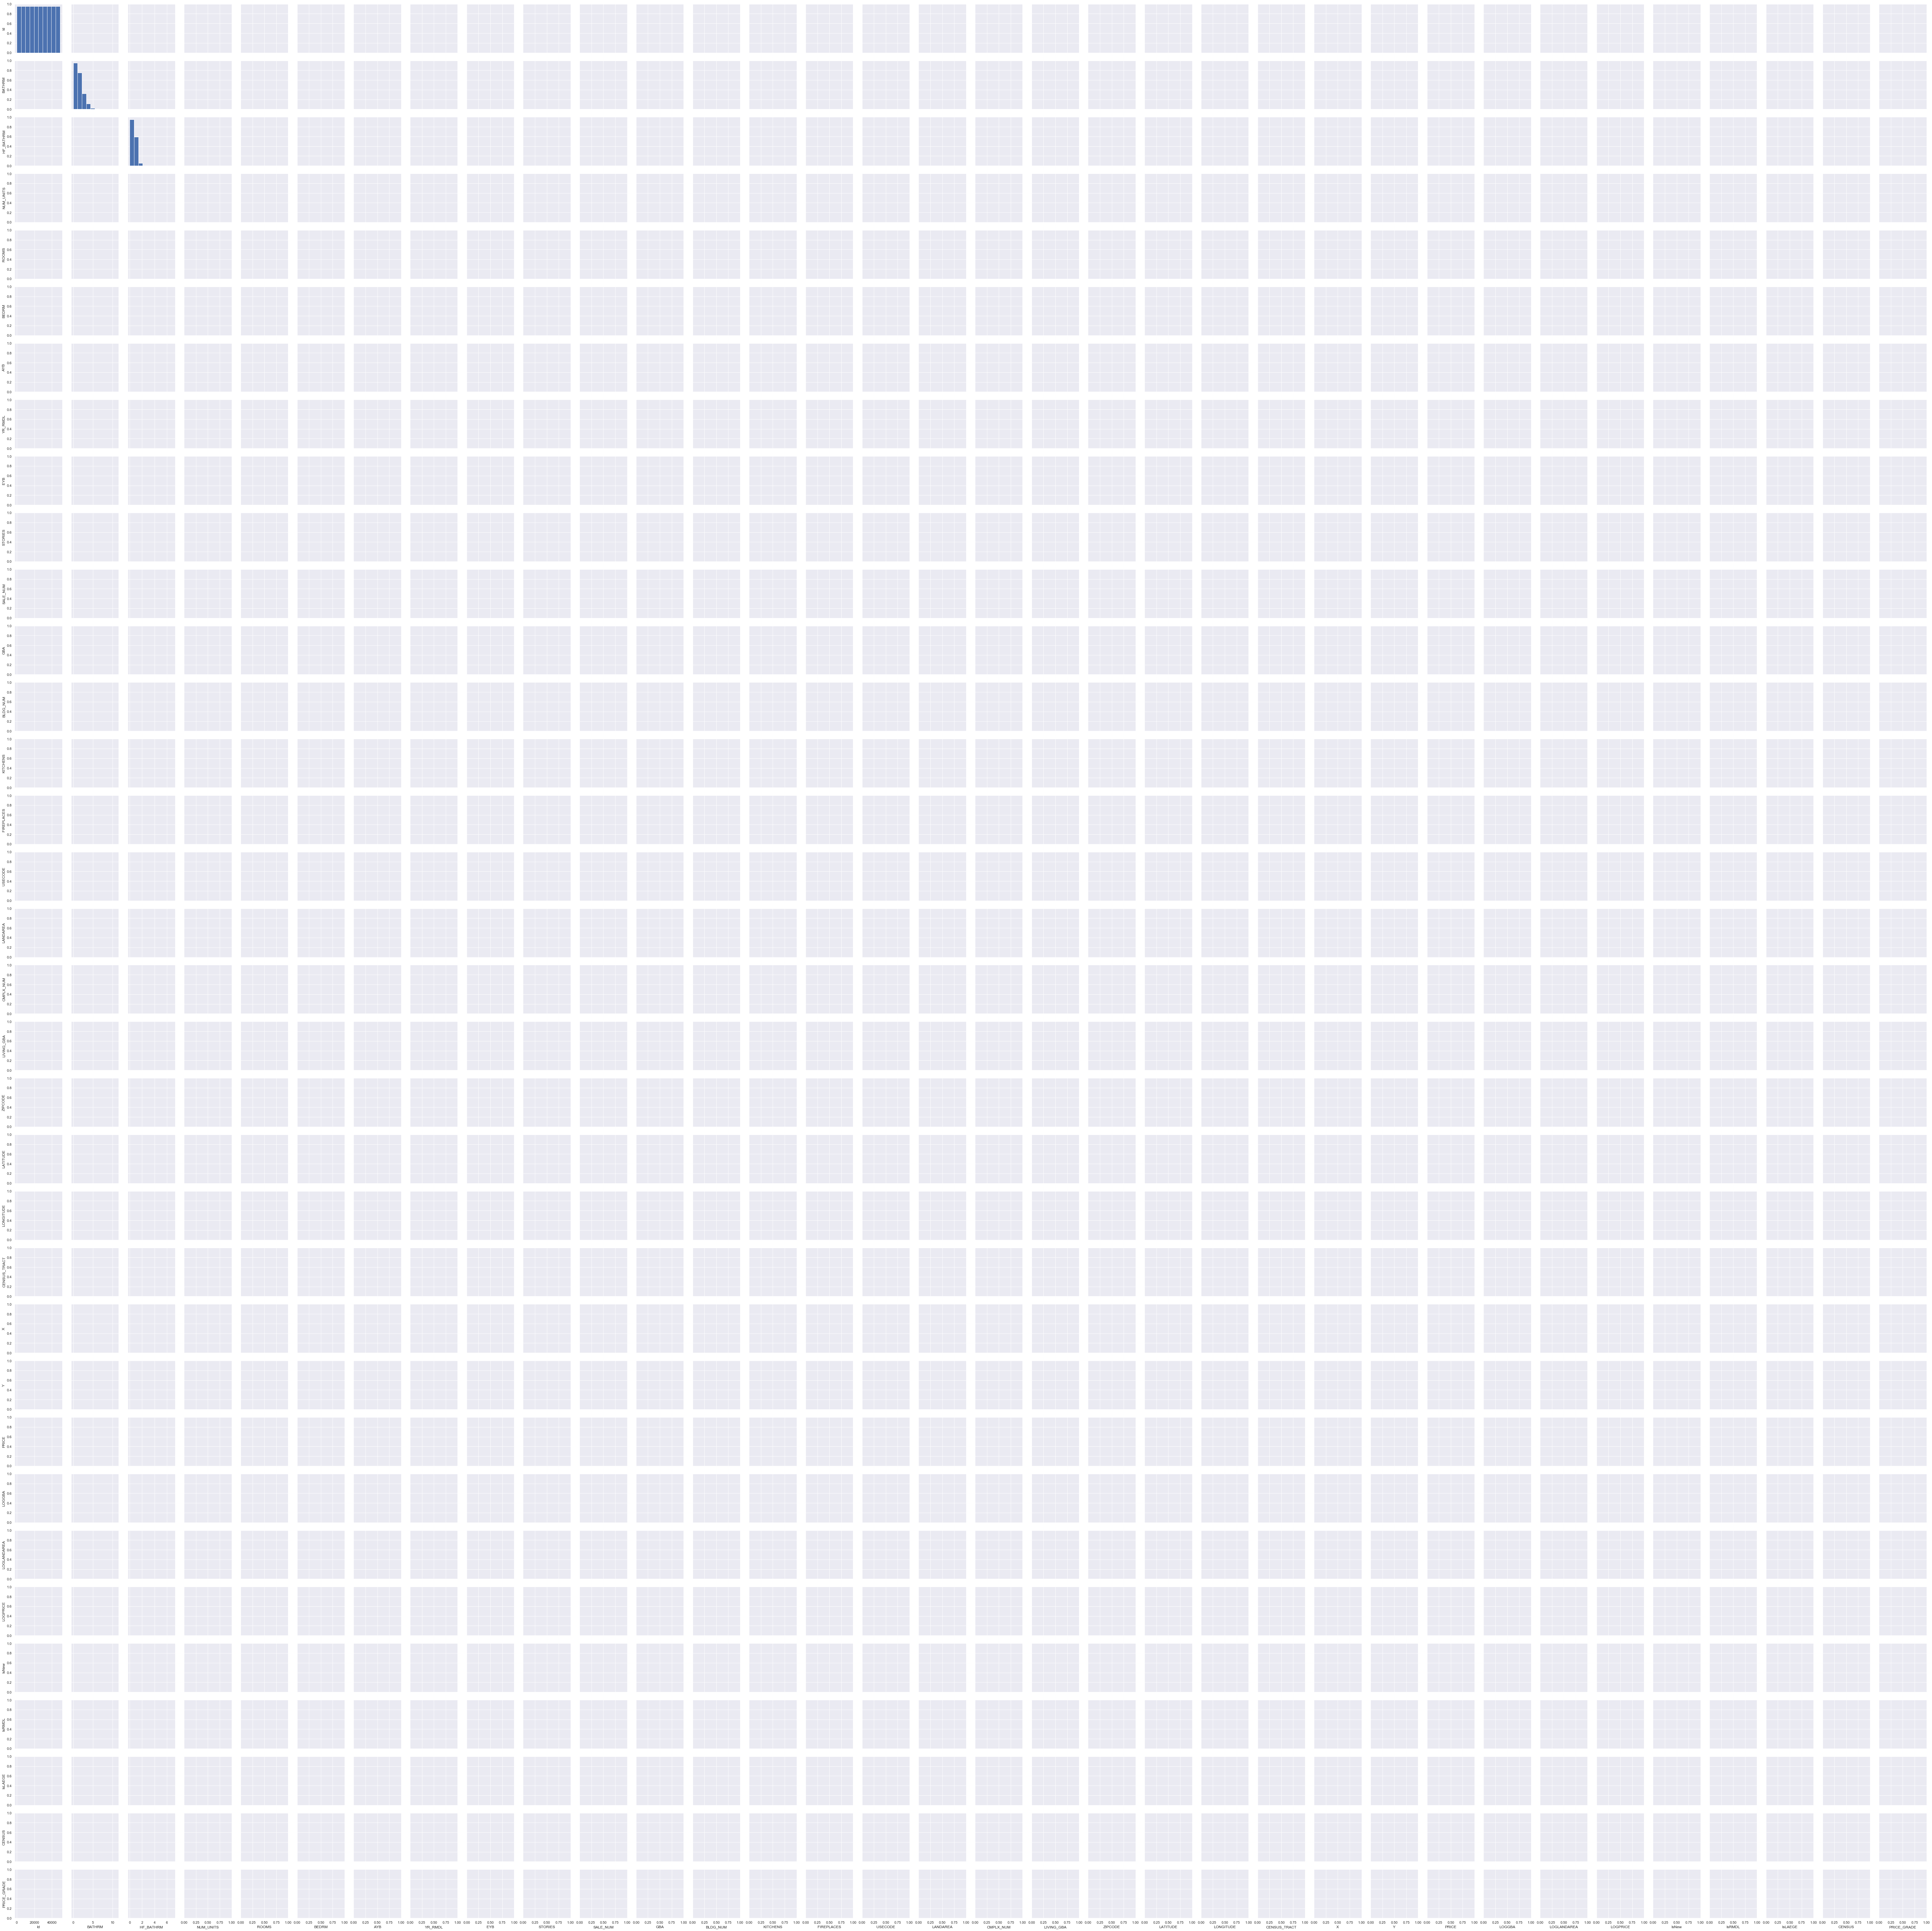

In [56]:
sns.pairplot(df_train)

In [ ]:
df_train = df_train[df_train["PRICE"]>53973000]

In [ ]:
df_train

In [ ]:
df_train.SQUARE.unique()

In [ ]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="SQUARE")


In [ ]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set_fixed.csv'), delim_whitespace=False)

In [ ]:
df_train

In [ ]:
sns.scatterplot(x="EYB", y="AYB", data=df_train,hue="SQUARE")


In [ ]:
df_test["SQUARE"] = df_test[df_test["SQUARE"] != "PAR"]
df_test["SQUARE"].apply(int)
def func_cate(x):
    if  x < 30:
        return 0
    elif x >= 30 and x < 60:
        return 1
    else:
        return 2


#df_train['CENSUS'] = df_train['CENSUS_TRACT'].apply(func_cate)
df_test['SQUARE_GRADE'] = df_test['SQUARE'].apply(func_cate)


In [ ]:
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_test,hue="SQUARE_GRADE")


In [ ]:
df_train["GIS_LAST_MOD_DTTM"].unique()
df_train["SOURCE"].unique()

In [ ]:
df_train["SALEDATE"] = pd.to_datetime(df_train['SALEDATE'])
df_train["GIS_LAST_MOD_DTTM"] = pd.to_datetime(df_train["GIS_LAST_MOD_DTTM"])
df_train.groupby(df_train.GIS_LAST_MOD_DTTM).PRICE.mean().plot()

In [ ]:
df_train.set_index('SALEDATE', inplace=True)

In [ ]:
df_train.index.year

In [ ]:
df_train.index.names

In [ ]:
df_train.columns

In [ ]:
def f(x):
    if x != x:
        return '2018'
    return x[:4]

In [ ]:
df_train['SALEYEAR'] = df_train.SALEDATE.apply(lambda x: f(x))


In [ ]:
df_test['SALEYEAR'] = df_test.SALEDATE.apply(lambda x: f(x))

In [ ]:
df_train.groupby('SALEYEAR').count().Id.plot()

In [ ]:
df_train.groupby(df_train.index.year).PRICE.mean().plot()
plt.ylim(0,10000000)
plt.xticks(rotation=90)

In [ ]:
df_train = df_train[df_train["PRICE"] < 1000000]

In [ ]:
df_train.groupby(df_train.index.year).PRICE.mean().plot()
plt.ylabel("PRICE")

plt.xticks(rotation=90)

In [ ]:
plt.scatter(df_train.Id,df_train.PRICE)

In [ ]:
def func_cate(x):
    if  x < 4000000:
        return 0
    elif x >= 4000000 and x < 6000000:
        return 1
    else:
        return 2


df_train['PRICE_GRADE'] = df_train['PRICE'].apply(func_cate)
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

In [ ]:
df_train.PRICE_GRADE==2

In [ ]:
df_train.groupby(df_train.index.year).PRICE.mean()

In [ ]:
df_train.groupby(df_train.index.day).PRICE.mean().plot()
plt.ylabel("PRICE")

plt.xticks(rotation=90)

In [ ]:
df_train

In [ ]:
var = 'SALEYEAR'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt

sns.set(font_scale=1) 
fig = sns.boxplot(x=var, y="PRICE", data=data)
plt.xticks(rotation=90)
plt.ylim(0,100000000)

In [ ]:
x = data["SALEYEAR"]
y = data["PRICE"]
plt.errorbar(x, y, fmt='.k')
plt.ylim(0,10000000)

In [ ]:
df_train.groupby('SALEYEAR').PRICE.std().plot()
df_train.groupby('SALEYEAR').PRICE.mean().plot()


In [ ]:
df_train.groupby('SALEYEAR').PRICE.std().plot()

In [ ]:
df_train.groupby('SALEYEAR').count().Id

In [ ]:
df_test.groupby('SALEYEAR').count().Id

In [ ]:
df_test.groupby('SALEYEAR').count().Id.plot()

In [ ]:
df_train

In [ ]:
sns.pairplot(df_train, hue="PRICE_GRADE")

In [ ]:
df_train.columns

In [ ]:
df_train.select_dtypes(include=[int, float, 'datetime'])

In [ ]:
df_train.select_dtypes(include=[int])

In [ ]:
plt.scatter(np.log(df_train["LIVING_GBA"]),np.log(df_train["LANDAREA"]))

In [ ]:
df_train = df_train[df_train["PRICE"]<1000000]

In [ ]:
df_train.groupby('AYB').PRICE.median().plot()

In [ ]:
df_train.groupby('EYB').PRICE.mean().plot()

In [ ]:
df_train.groupby('YR_RMDL').PRICE.mean().plot()
plt.xlim(1800,2020)